# Explore GADME German-FSL Huggingface dataset

1. Log in to Huggingface (if the repository is private)

```bash
huggingface-cli login
```


1. Load dataset

In [9]:
from datasets import load_dataset, DatasetDict

cache_dir = "/workspace/data/FSL"

dataset: DatasetDict = load_dataset(name='german_endangered_birds', path='DBD-research-group/german_endangered_birds', cache_dir=cache_dir) # type: ignore

In [10]:
dataset['train'][0]


{'audio': {'path': '/workspace/data/FSL/downloads/extracted/da0171f382b87fc995c24b17bc72d7827305e6acfee78744c19c5b9a053534ef/data/xeno-canto/europe/acrocephalus_paludicola/XC454693.ogg',
  'array': array([-1.67055587e-05, -1.77514739e-05, -3.24007488e-05, ...,
          1.67471357e-04,  1.18422948e-04, -3.75589661e-06]),
  'sampling_rate': 32000},
 'filepath': '/workspace/data/FSL/downloads/extracted/da0171f382b87fc995c24b17bc72d7827305e6acfee78744c19c5b9a053534ef/data/xeno-canto/europe/acrocephalus_paludicola/XC454693.ogg',
 'start_time': None,
 'end_time': None,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': 68,
 'ebird_code_multilabel': [69],
 'ebird_code_secondary': ['aquwar1'],
 'call_type': 'song',
 'sex': 'male',
 'lat': 53.285,
 'long': 22.606,
 'length': 20,
 'microphone': 'focal',
 'license': '//creativecommons.org/licenses/by-nc-sa/4.0/',
 'source': 'xenocanto',
 'local_time': '10:00',
 'detected_events': [[2.848, 4.384]],
 'event_cluster': [-1],
 'quality': 'B',
 're

In [11]:
# check if there are some samples in the dataset that have more than one entry in 'dectected_events'
def check_for_duplicates(dataset: DatasetDict) -> None:
    for i, sample in enumerate(dataset['train']):
        if len(sample['detected_events']) > 1:
            print(i, sample['detected_events'])
            break

check_for_duplicates(dataset)

2 [[2.72, 3.488], [7.552, 9.04], [11.088, 12.336], [13.504, 14.16], [16.496, 17.248], [18.288, 19.408], [20.4, 21.568], [24.624, 25.152], [26.928, 27.44], [29.872, 31.024], [32.368, 33.152], [34.752, 35.536], [38.704, 39.344], [41.424, 42.304], [49.84, 51.28], [58.4, 59.328], [64.576, 65.504], [67.504, 68.56], [69.424, 70.448], [71.392, 73.872], [83.584, 85.936]]


In [12]:
dataset['train'][2]

{'audio': {'path': '/workspace/data/FSL/downloads/extracted/da0171f382b87fc995c24b17bc72d7827305e6acfee78744c19c5b9a053534ef/data/xeno-canto/europe/acrocephalus_paludicola/XC425702.ogg',
  'array': array([-0.01233249, -0.0195889 , -0.01939561, ...,  0.0045288 ,
          0.00462732,  0.00523063]),
  'sampling_rate': 32000},
 'filepath': '/workspace/data/FSL/downloads/extracted/da0171f382b87fc995c24b17bc72d7827305e6acfee78744c19c5b9a053534ef/data/xeno-canto/europe/acrocephalus_paludicola/XC425702.ogg',
 'start_time': None,
 'end_time': None,
 'low_freq': None,
 'high_freq': None,
 'ebird_code': 68,
 'ebird_code_multilabel': [69],
 'ebird_code_secondary': ['aquwar1'],
 'call_type': 'song',
 'sex': 'male',
 'lat': 53.2856,
 'long': 22.6054,
 'length': 87,
 'microphone': 'focal',
 'license': '//creativecommons.org/licenses/by-nc-sa/4.0/',
 'source': 'xenocanto',
 'local_time': '16:30',
 'detected_events': [[2.72, 3.488],
  [7.552, 9.04],
  [11.088, 12.336],
  [13.504, 14.16],
  [16.496, 17

In [4]:
# get basic statistics

# get number of examples
print('Number of samples: ', len(dataset['train']))

# get number of ebird_codes
print('Number of classes: ',len(dataset['train'].unique('ebird_code')))

dataset['train'].features

Number of samples:  24428
Number of classes:  86


{'audio': Audio(sampling_rate=32000, mono=True, decode=True, id=None),
 'filepath': Value(dtype='string', id=None),
 'start_time': Value(dtype='float64', id=None),
 'end_time': Value(dtype='float64', id=None),
 'low_freq': Value(dtype='int64', id=None),
 'high_freq': Value(dtype='int64', id=None),
 'ebird_code': ClassLabel(names=['gargan', 'norsho', 'norpin', 'gnwtea', 'ferduc', 'commer', 'hazgro1', 'wescap1', 'blagro1', 'grypar', 'relpar1', 'eurnig1', 'grebus1', 'litbus1', 'comcuc', 'eutdov', 'corcra', 'spocra1', 'litcra1', 'eargre', 'eutkne1', 'norlap', 'eugplo', 'corplo', 'kenplo1', 'eurdot', 'eurcur', 'bktgod', 'rudtur', 'ruff', 'dunlin', 'gresni1', 'comsni', 'comsan', 'comred1', 'woosan', 'bklkit', 'gubter1', 'caster1', 'santer1', 'litter1', 'arcter', 'blkter', 'atlpuf', 'waldra1', 'grebit1', 'litbit1', 'bcnher', 'osprey', 'eurgri1', 'shteag1', 'leseag1', 'norhar1', 'monhar1', 'sheowl', 'hoopoe', 'eurrol1', 'eurwry', 'leswoo1', 'whbwoo1', 'gyfwoo1', 'eurhob', 'sakfal1', 'ruffie2',

# Load with base_datamodule

<!--  -->

## Waveform

In [1]:
from src.datamodule.base_datamodule import DatasetConfig
from src.datamodule.components.event_decoding import EventDecoding
from src.datamodule.components.transforms import TransformsWrapper
from src.datamodule.gadme_datamodule import GADMEDataModule
transforms = TransformsWrapper(
    decoding=EventDecoding(sampling_rate=32000),
)
dataset_config = DatasetConfig(
    data_dir="/workspace/data/FSL",
    dataset_name="german_endangered_birds",
    hf_path="DBD-research-group/german_endangered_birds",
    hf_name="",
    seed=42,
    n_classes=86,
    n_workers=1,
    val_split=0.2,
    task="multiclass",
    subset=None,
    sampling_rate=32000,
)

dm_waveform = GADMEDataModule(dataset=dataset_config, transforms=transforms)
dm_waveform.prepare_data()
print(dm_waveform.len_trainset)
print(dm_waveform.num_classes)
dm_waveform.setup(stage='fit')


Saving the dataset (0/1 shards):   0%|          | 0/55373 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/13844 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4886 [00:00<?, ? examples/s]

55373
86


In [2]:
dm_waveform.train_dataset[r:32]

32


{'input_values': tensor([[[-1.9463e-10,  9.4875e-10,  6.8819e-10,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],
 
         [[-7.6947e-03, -5.6499e-03, -4.0055e-03,  ...,  1.1766e-02,
            1.1027e-02,  1.0834e-02]],
 
         [[-7.0927e-03, -8.1596e-03, -8.4887e-03,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],
 
         ...,
 
         [[ 2.0283e-03,  1.4764e-03,  1.0156e-03,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],
 
         [[ 3.4020e-03,  7.3205e-03,  1.0402e-02,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],
 
         [[-5.2923e-03, -5.3296e-03, -2.3640e-03,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]]),
 'labels': [0,
  0,
  79,
  79,
  0,
  0,
  16,
  57,
  26,
  0,
  0,
  0,
  23,
  34,
  0,
  70,
  85,
  0,
  38,
  57,
  83,
  67,
  0,
  0,
  78,
  82,
  0,
  0,
  85,
  57,
  55,
  60]}

In [28]:
# load batch with dataloader and listen to first sample
train_dataloader = dm_waveform.train_dataloader
# get first batch
batch = next(iter(train_dataloader()))
print(batch.keys())
print(batch['input_values'].shape)


32
32
dict_keys(['input_values', 'labels'])
torch.Size([32, 1, 160000])


In [16]:
import IPython.display as ipd
waveform = batch['input_values'][15].squeeze().numpy()
ipd.Audio(waveform, rate=32000)

## Spectogram

In [21]:
from src.datamodule.components.event_decoding import EventDecoding
from src.datamodule.components.transforms import PreprocessingConfig, TransformsWrapper
from src.datamodule.base_datamodule import DatasetConfig
from src.datamodule.gadme_datamodule import GADMEDataModule

transforms = TransformsWrapper(model_type='vision', decoding=EventDecoding(sampling_rate=32000))
dataset_config = DatasetConfig(
    data_dir="/workspace/data/FSL",
    dataset_name="german_endangered_birds",
    hf_path="DBD-research-group/german_endangered_birds",
    hf_name="",
    seed=42,
    n_classes=86,
    n_workers=1,
    val_split=0.2,
    task="multiclass",
    subset=None,
    sampling_rate=32000,
)

dm = GADMEDataModule(dataset=dataset_config, transforms=transforms)


In [22]:
dm.prepare_data()
print(dm.len_trainset)
print(dm.num_classes)

Saving the dataset (0/1 shards):   0%|          | 0/55373 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/13844 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4886 [00:00<?, ? examples/s]

55373
86


In [23]:
dm.setup(stage='fit')

dict_keys(['input_values', 'labels'])
torch.Size([32, 1, 128, 1024])


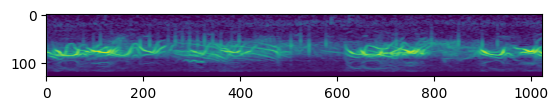

In [28]:
from matplotlib import pyplot as plt
train_dataloader = dm.train_dataloader
# get first batch
batch = next(iter(train_dataloader()))
print(batch.keys())
print(batch['input_values'].shape)
spectorgram = batch['input_values'][0]
plt.imshow(spectorgram.squeeze().numpy())